# Vanilla Production Study by Huygens Ravelomanana

<img src='1280px-Sambava_-_grading_vanilla_beans.jpg'>
Women grading vanilla beans. Sambava, Madagascar.<br>
Photo by Jonathan Talbot, World Resources Institute. 2001. Licensed under
 <a rel="license" href="https://creativecommons.org/licenses/by/2.0">Creative Commons Attribution 2.0 Generic License</a>

# BUSINESS UNDERSTANDING
- Identify the major producers.
- Understand the evolution of the production (in quantity).
- Forecast future (next year or next couple of years) production of the major producers.


# DATA PREPARATION / DATA UNDERSTANDING

# Importing Libraries

In [1]:
import numpy as np
from numpy import nan
import pandas
import matplotlib.pyplot as plt
import seaborn

seaborn.set(style='whitegrid')

## Loading and exploring the raw data

In [2]:
vanilla_raw = pandas.read_csv('data/FAOSTAT_vanilla_data_7-6-2020.csv')

In [3]:
vanilla_raw.shape

(2288, 15)

In [4]:
vanilla_raw.head(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QC,Crops,351,China,5312,Area harvested,692,Vanilla,1961,1961,ha,NaN,A,"Aggregate, may include official, semi-official...",NaN
1,QC,Crops,351,China,5510,Production,692,Vanilla,1961,1961,tonnes,NaN,A,"Aggregate, may include official, semi-official...",NaN
2,QC,Crops,351,China,5312,Area harvested,692,Vanilla,1962,1962,ha,NaN,A,"Aggregate, may include official, semi-official...",NaN
3,QC,Crops,351,China,5510,Production,692,Vanilla,1962,1962,tonnes,NaN,A,"Aggregate, may include official, semi-official...",NaN
4,QC,Crops,351,China,5312,Area harvested,692,Vanilla,1963,1963,ha,NaN,A,"Aggregate, may include official, semi-official...",NaN


In [5]:
vanilla_raw.columns.values

array(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'], dtype=object)

In [6]:
vanilla_raw.Area.unique()

array(['China', 'Comoros', 'French Polynesia', 'Guadeloupe', 'Indonesia',
       'Kenya', 'Madagascar', 'Malawi', 'Mexico', 'Papua New Guinea',
       'Réunion', 'Tonga', 'Turkey', 'Uganda', 'Zimbabwe'], dtype=object)

In [7]:
vanilla_df = vanilla_raw[['Area','Year', 'Unit','Value']]

In [8]:
vanilla_df.head(10)

,Area,Year,Unit,Value
0,China,1961,ha,NaN
1,China,1961,tonnes,NaN
2,China,1962,ha,NaN
3,China,1962,tonnes,NaN
4,China,1963,ha,NaN
5,China,1963,tonnes,NaN
6,China,1964,ha,NaN
7,China,1964,tonnes,NaN
8,China,1965,ha,NaN
9,China,1965,tonnes,NaN


In [9]:
vanilla_cultivation = vanilla_df[vanilla_df['Unit']=='ha']

In [10]:
vanilla_cultivation.head(10)

,Area,Year,Unit,Value
0,China,1961,ha,NaN
2,China,1962,ha,NaN
4,China,1963,ha,NaN
6,China,1964,ha,NaN
8,China,1965,ha,NaN
10,China,1966,ha,NaN
12,China,1967,ha,NaN
14,China,1968,ha,NaN
16,China,1969,ha,NaN
18,China,1970,ha,NaN


In [11]:
vanilla_production = vanilla_df[vanilla_df['Unit']=='tonnes']

In [12]:
vanilla_production.head(10)

,Area,Year,Unit,Value
1,China,1961,tonnes,NaN
3,China,1962,tonnes,NaN
5,China,1963,tonnes,NaN
7,China,1964,tonnes,NaN
9,China,1965,tonnes,NaN
11,China,1966,tonnes,NaN
13,China,1967,tonnes,NaN
15,China,1968,tonnes,NaN
17,China,1969,tonnes,NaN
19,China,1970,tonnes,NaN


In [13]:
vanilla_production = vanilla_production[vanilla_production['Value'].notna()]

In [14]:
vanilla_production.shape

(702, 4)

In [15]:
vanilla_production.Year = pandas.to_datetime(vanilla_production.Year, format='%Y')

In [16]:
vanilla_production.Year

50     1985-01-01
53     1986-01-01
56     1987-01-01
59     1988-01-01
62     1989-01-01
          ...    
2275   2014-01-01
2278   2015-01-01
2281   2016-01-01
2284   2017-01-01
2287   2018-01-01
Name: Year, Length: 702, dtype: datetime64[ns]

In [17]:
vanilla_production = vanilla_production.sort_values(by='Year')

In [18]:
vanilla_production = vanilla_production.reset_index().drop('index', axis=1)

In [19]:
vanilla_production.head(14)

,Area,Year,Unit,Value
0,Uganda,1961-01-01,tonnes,10.0
1,French Polynesia,1961-01-01,tonnes,193.0
2,Mexico,1961-01-01,tonnes,232.0
3,Madagascar,1961-01-01,tonnes,700.0
4,Réunion,1961-01-01,tonnes,45.0
5,Indonesia,1961-01-01,tonnes,100.0
6,Guadeloupe,1961-01-01,tonnes,4.0
7,Comoros,1961-01-01,tonnes,90.0
8,Réunion,1962-01-01,tonnes,35.0
9,Mexico,1962-01-01,tonnes,202.0


In [20]:
vanilla_production.tail(20)

,Area,Year,Unit,Value
682,Guadeloupe,2017-01-01,tonnes,11.0
683,Réunion,2017-01-01,tonnes,18.0
684,French Polynesia,2017-01-01,tonnes,20.0
685,Mexico,2017-01-01,tonnes,515.0
686,Comoros,2017-01-01,tonnes,31.0
687,Madagascar,2018-01-01,tonnes,3102.0
688,Mexico,2018-01-01,tonnes,495.0
689,Réunion,2018-01-01,tonnes,17.0
690,Malawi,2018-01-01,tonnes,20.0
691,Tonga,2018-01-01,tonnes,182.0


In [21]:
# checking if there are still NaN values
vanilla_production.isna().any()

Area     False
Year     False
Unit     False
Value    False
dtype: bool

In [22]:
# checking if there are null values
vanilla_production.isnull().any()

Area     False
Year     False
Unit     False
Value    False
dtype: bool

In [23]:
vanilla_production.describe()

,Value
count,702.000000
mean,350.737892
std,671.360075
min,0.000000
25%,12.250000
50%,48.000000
75%,290.750000
max,3768.000000


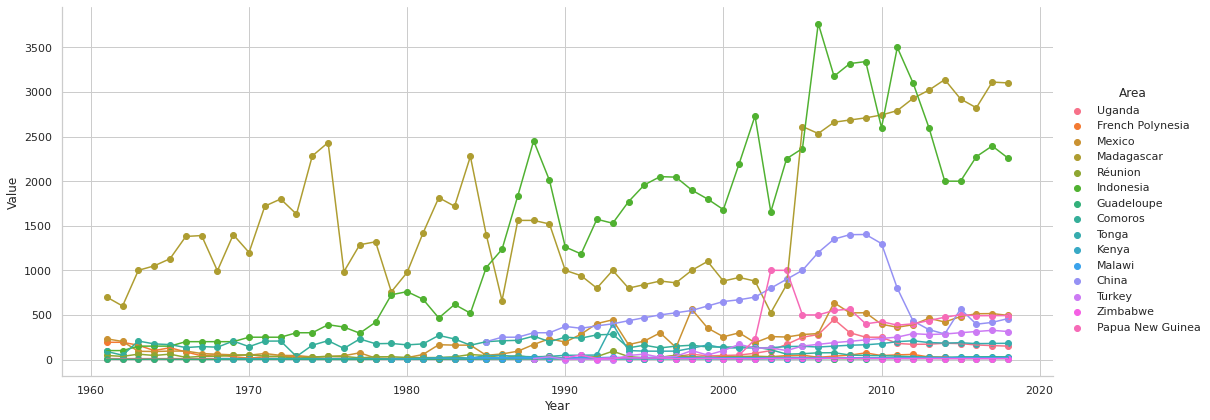

In [24]:
fg = seaborn.FacetGrid(data=vanilla_production,
                       hue='Area',
                       aspect=2.5,
                       height=6,
                       )
fg.map(plt.scatter, 'Year', 'Value')
fg.map(plt.plot, 'Year', 'Value').add_legend()

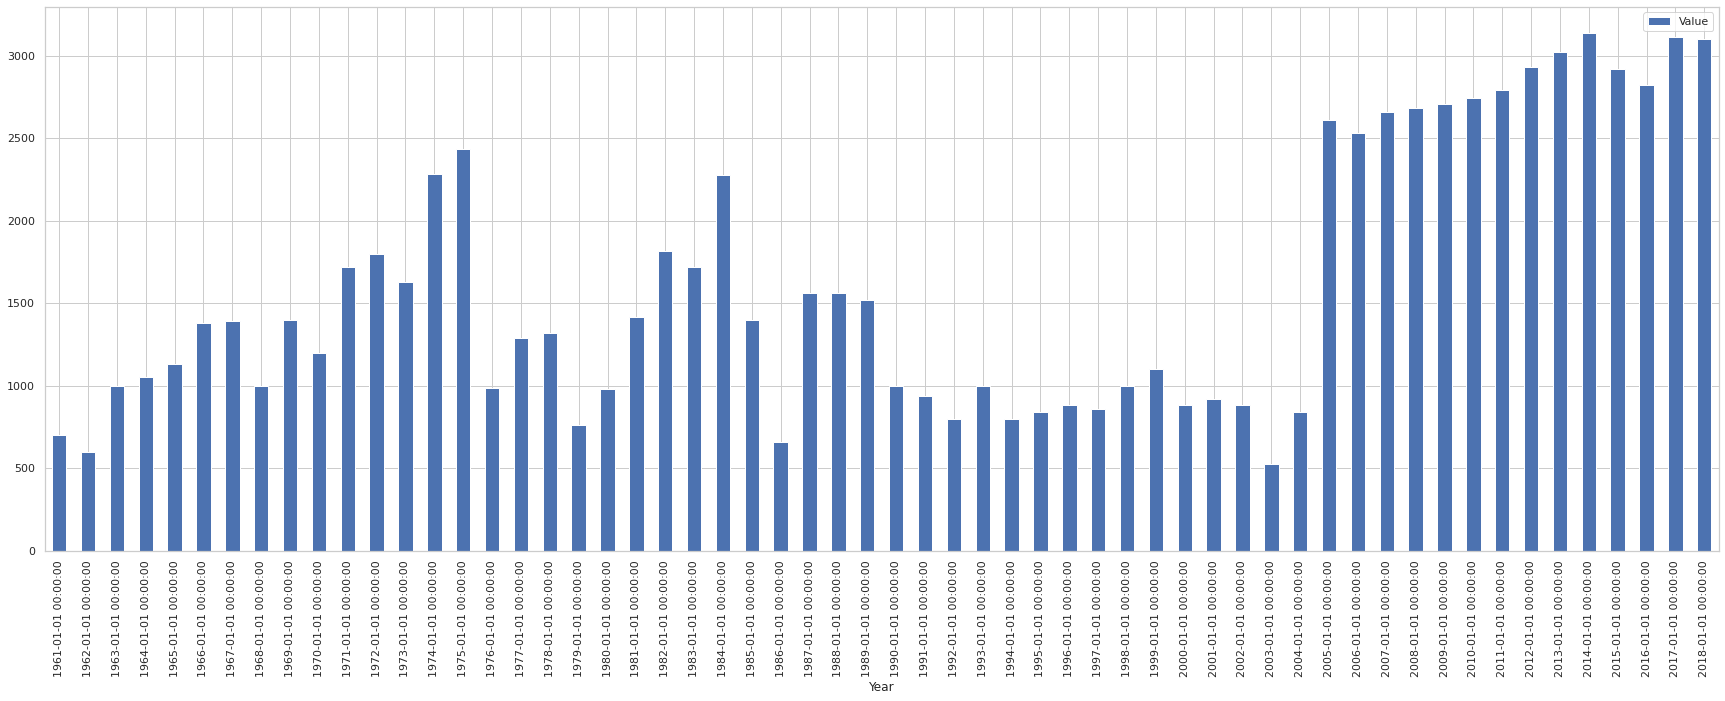

In [25]:
vanilla_production[vanilla_production.Area=='Madagascar'].plot.bar(x='Year', y='Value', figsize=(30,10))

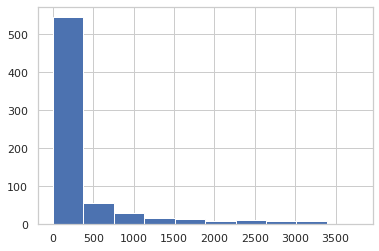

In [26]:
vanilla_production['Value'].hist()
plt.show()

In [27]:
vanilla_production[vanilla_production['Year']== '2018-01-01'].sort_values(by='Value', ascending=False)

,Area,Year,Unit,Value
687,Madagascar,2018-01-01,tonnes,3102.0
693,Indonesia,2018-01-01,tonnes,2259.0
688,Mexico,2018-01-01,tonnes,495.0
694,Papua New Guinea,2018-01-01,tonnes,493.0
699,China,2018-01-01,tonnes,459.0
695,Turkey,2018-01-01,tonnes,314.0
691,Tonga,2018-01-01,tonnes,182.0
692,Uganda,2018-01-01,tonnes,150.0
698,Comoros,2018-01-01,tonnes,30.0
690,Malawi,2018-01-01,tonnes,20.0


In [28]:
vanilla_production[vanilla_production['Year']== '2017-01-01'].sort_values(by='Value', ascending=False)

,Area,Year,Unit,Value
676,Madagascar,2017-01-01,tonnes,3111.0
677,Indonesia,2017-01-01,tonnes,2395.0
685,Mexico,2017-01-01,tonnes,515.0
673,Papua New Guinea,2017-01-01,tonnes,492.0
672,China,2017-01-01,tonnes,416.0
679,Turkey,2017-01-01,tonnes,327.0
675,Tonga,2017-01-01,tonnes,180.0
674,Uganda,2017-01-01,tonnes,156.0
686,Comoros,2017-01-01,tonnes,31.0
678,Malawi,2017-01-01,tonnes,20.0


## Comment

### The two main producers are Idonesia and Madagascar but the presence of small or medium preducer are also important

We are going to consider only 3 main producer: Indonesia, Madagascar, and Others.<br>
Others will be the combination of the other small producers.

## Creating a final data frame
- We will createa single dataframe with columns: Years, Indonesia, Madagascar, Others, Total.
- The last four columns will contains the yearly production for Indonesia, Madagascar, Others and the Total world production

In [29]:
producers = vanilla_production['Area'].unique()
temp_df = vanilla_production[(vanilla_production.Area != 'Indonesia')
                              &
                              (vanilla_production.Area != 'Madagascar')]

new_df = pandas.DataFrame(temp_df.groupby(by='Year').Value.sum())
new_df.reset_index(inplace=True)
new_df['Area'] = ['Others']*len(new_df)
new_df = new_df[['Year', 'Area', 'Value']]

In [30]:
new_df.head()

,Year,Area,Value
0,1961-01-01,Others,574.0
1,1962-01-01,Others,490.0
2,1963-01-01,Others,531.0
3,1964-01-01,Others,424.0
4,1965-01-01,Others,466.0


In [31]:
new_df.Area.unique()

array(['Others'], dtype=object)

In [32]:
others_df = new_df.drop('Area', axis=1)
others_df.rename({'Value': 'Others'}, axis=1, inplace=True)
others_df.sort_values(by='Year', inplace=True)
others_df.reset_index(drop=True, inplace=True)

In [33]:
others_df

,Year,Others
0,1961-01-01,574.0
1,1962-01-01,490.0
2,1963-01-01,531.0
3,1964-01-01,424.0
4,1965-01-01,466.0
5,1966-01-01,351.0
6,1967-01-01,301.0
7,1968-01-01,309.0
8,1969-01-01,359.0
9,1970-01-01,283.0


In [34]:
id_df = vanilla_production[vanilla_production.Area == 'Indonesia']
mg_df = vanilla_production[vanilla_production.Area == 'Madagascar']

id_df = id_df.drop(['Unit', 'Area'], axis=1)
id_df = id_df.rename({'Value': 'Indonesia'}, axis=1)
id_df.sort_values(by='Year', inplace=True)
id_df.reset_index(drop=True, inplace=True)

mg_df = mg_df.drop(['Unit', 'Area'], axis=1)
mg_df = mg_df.rename({'Value': 'Madagascar'}, axis=1)
mg_df.sort_values(by='Year', inplace=True)
mg_df.reset_index(drop=True, inplace=True)


In [35]:
mg_df.head()

,Year,Madagascar
0,1961-01-01,700.0
1,1962-01-01,600.0
2,1963-01-01,1000.0
3,1964-01-01,1050.0
4,1965-01-01,1130.0


In [36]:
id_df.head()

,Year,Indonesia
0,1961-01-01,100.0
1,1962-01-01,100.0
2,1963-01-01,150.0
3,1964-01-01,150.0
4,1965-01-01,150.0


In [37]:
vanilla_prod_final = pandas.concat([
                                    id_df,
                                    mg_df.Madagascar,
                                    others_df.Others
                                    ],
                                   axis=1)
vanilla_prod_final['Total'] = vanilla_prod_final.Indonesia\
                              + vanilla_prod_final.Madagascar\
                              + vanilla_prod_final.Others
vanilla_prod_final.head(9)


,Year,Indonesia,Madagascar,Others,Total
0,1961-01-01,100.0,700.0,574.0,1374.0
1,1962-01-01,100.0,600.0,490.0,1190.0
2,1963-01-01,150.0,1000.0,531.0,1681.0
3,1964-01-01,150.0,1050.0,424.0,1624.0
4,1965-01-01,150.0,1130.0,466.0,1746.0
5,1966-01-01,200.0,1380.0,351.0,1931.0
6,1967-01-01,200.0,1390.0,301.0,1891.0
7,1968-01-01,200.0,995.0,309.0,1504.0
8,1969-01-01,200.0,1400.0,359.0,1959.0


In [38]:
vanilla_prod_final.tail(9)

,Year,Indonesia,Madagascar,Others,Total
49,2010-01-01,2600.0,2742.0,2945.0,8287.0
50,2011-01-01,3500.0,2791.0,2343.0,8634.0
51,2012-01-01,3100.0,2929.0,2056.0,8085.0
52,2013-01-01,2600.0,3021.0,2011.0,7632.0
53,2014-01-01,2000.0,3139.0,1960.0,7099.0
54,2015-01-01,2000.0,2922.0,2331.0,7253.0
55,2016-01-01,2275.0,2823.0,2180.0,7278.0
56,2017-01-01,2395.0,3111.0,2211.0,7717.0
57,2018-01-01,2259.0,3102.0,2214.0,7575.0


## Exploring and Understanding the final dataframe

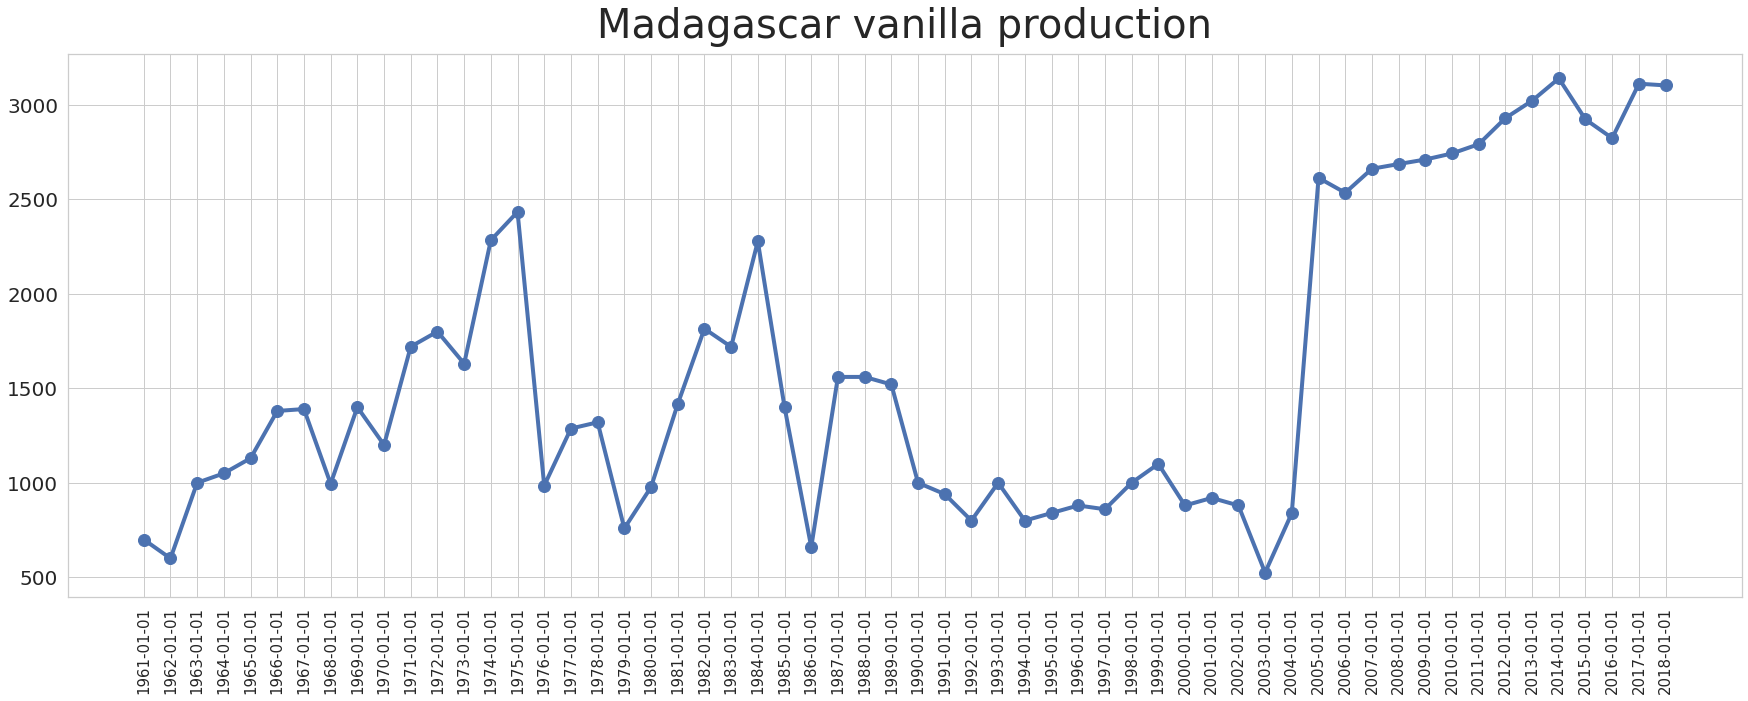

In [39]:
def plot_production(country):
    '''
    Plot the time series of vanilla production for the specified country: country
    Parameters:
    ----------
                country (str): a value in vanilla_production.Area
    '''
    plt.figure(figsize=(30,10))
    x = vanilla_prod_final['Year']
    y = vanilla_prod_final[country]
    plt.plot(x,y, 'o-', linewidth=4, markersize=12)
    plt.xticks(x, rotation=90, fontsize=15)
    plt.yticks(fontsize=20)
    plt.title(f'{country.capitalize()} vanilla production', fontsize=40, pad=16)
    plt.show()

plot_production('Madagascar')

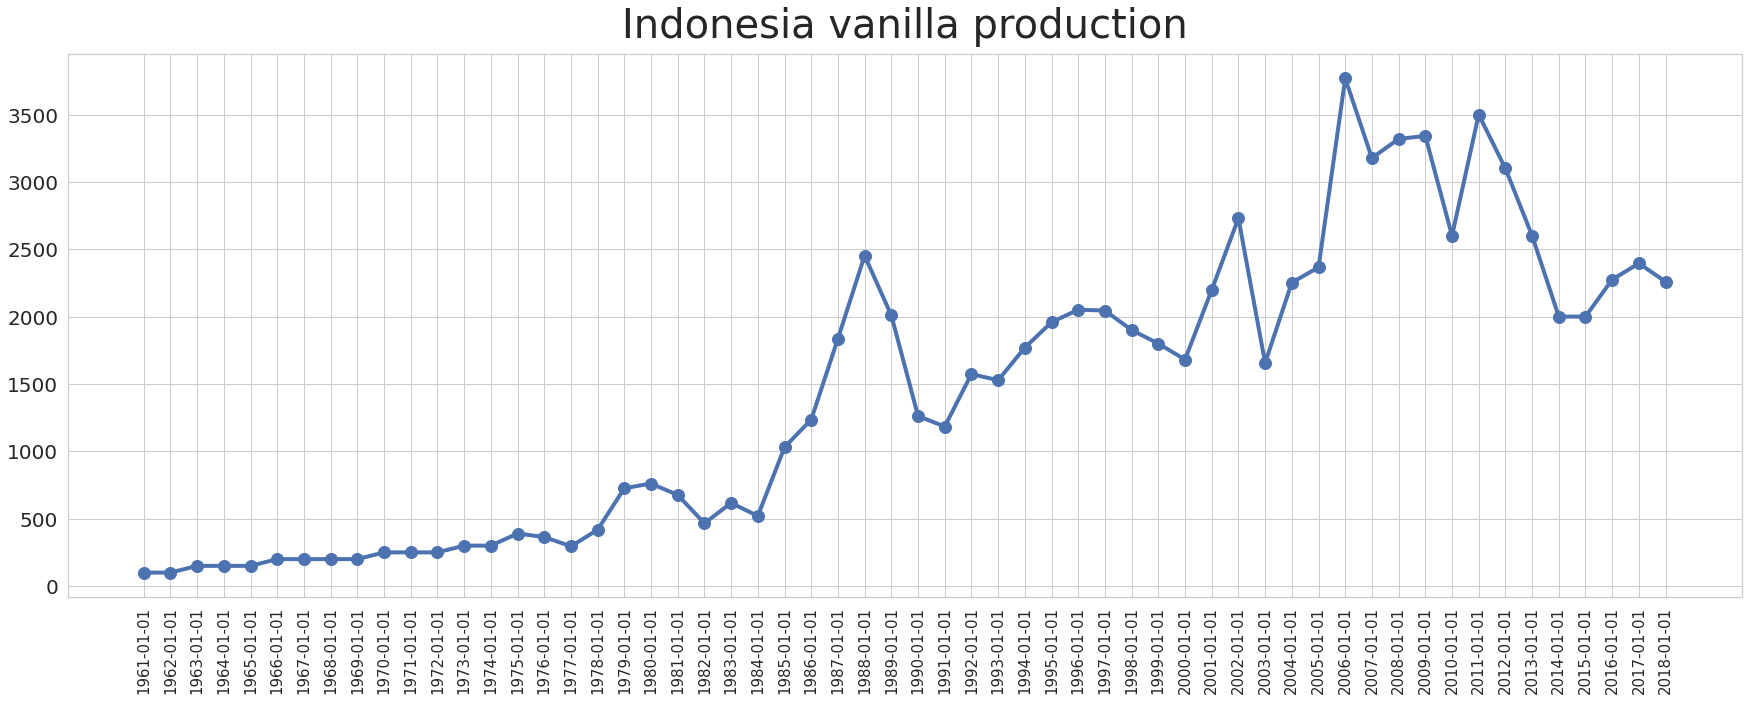

In [40]:
plot_production('Indonesia')

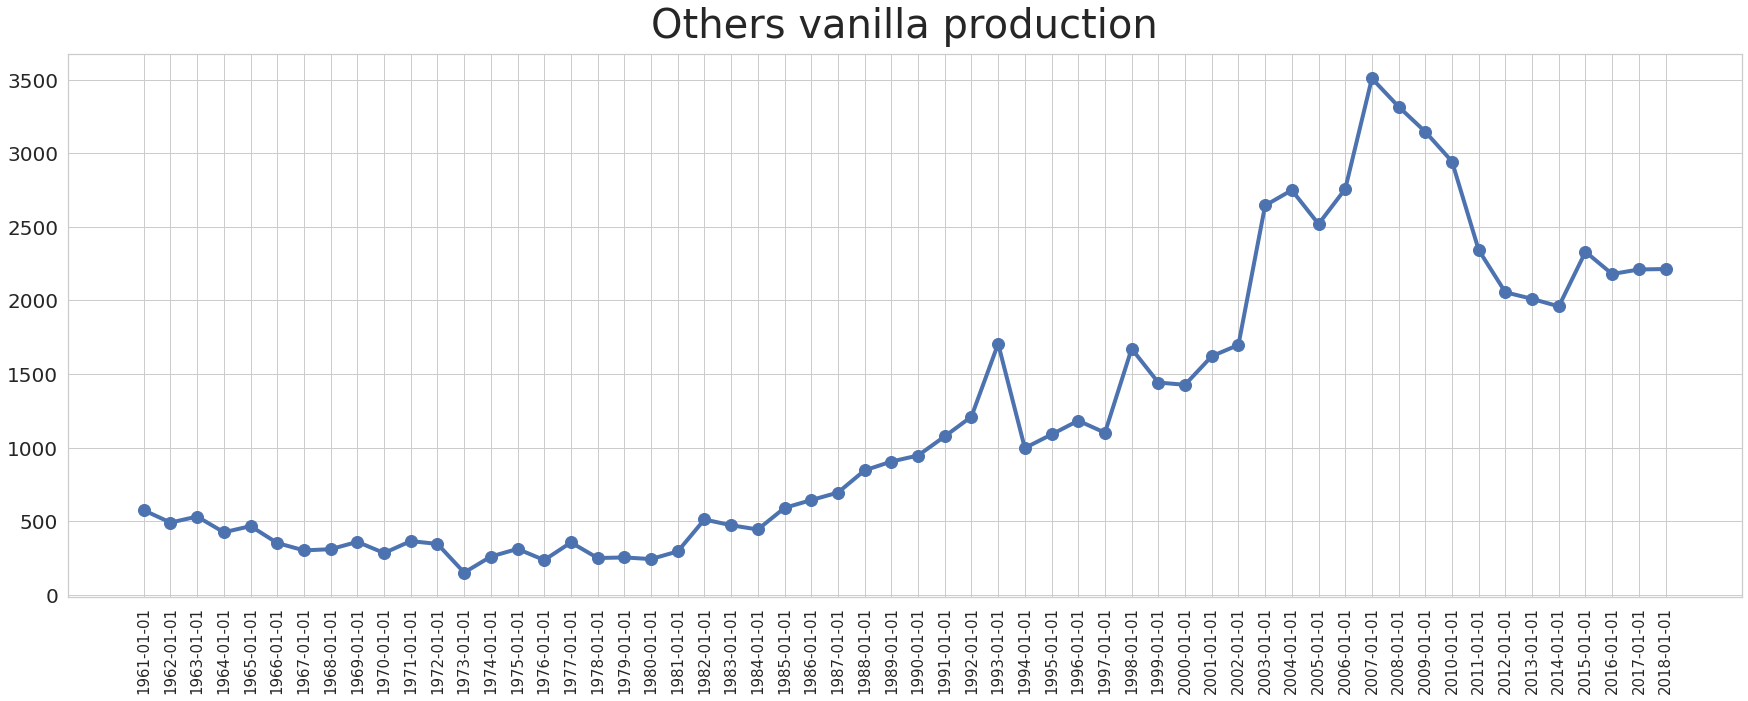

In [41]:
plot_production('Others')

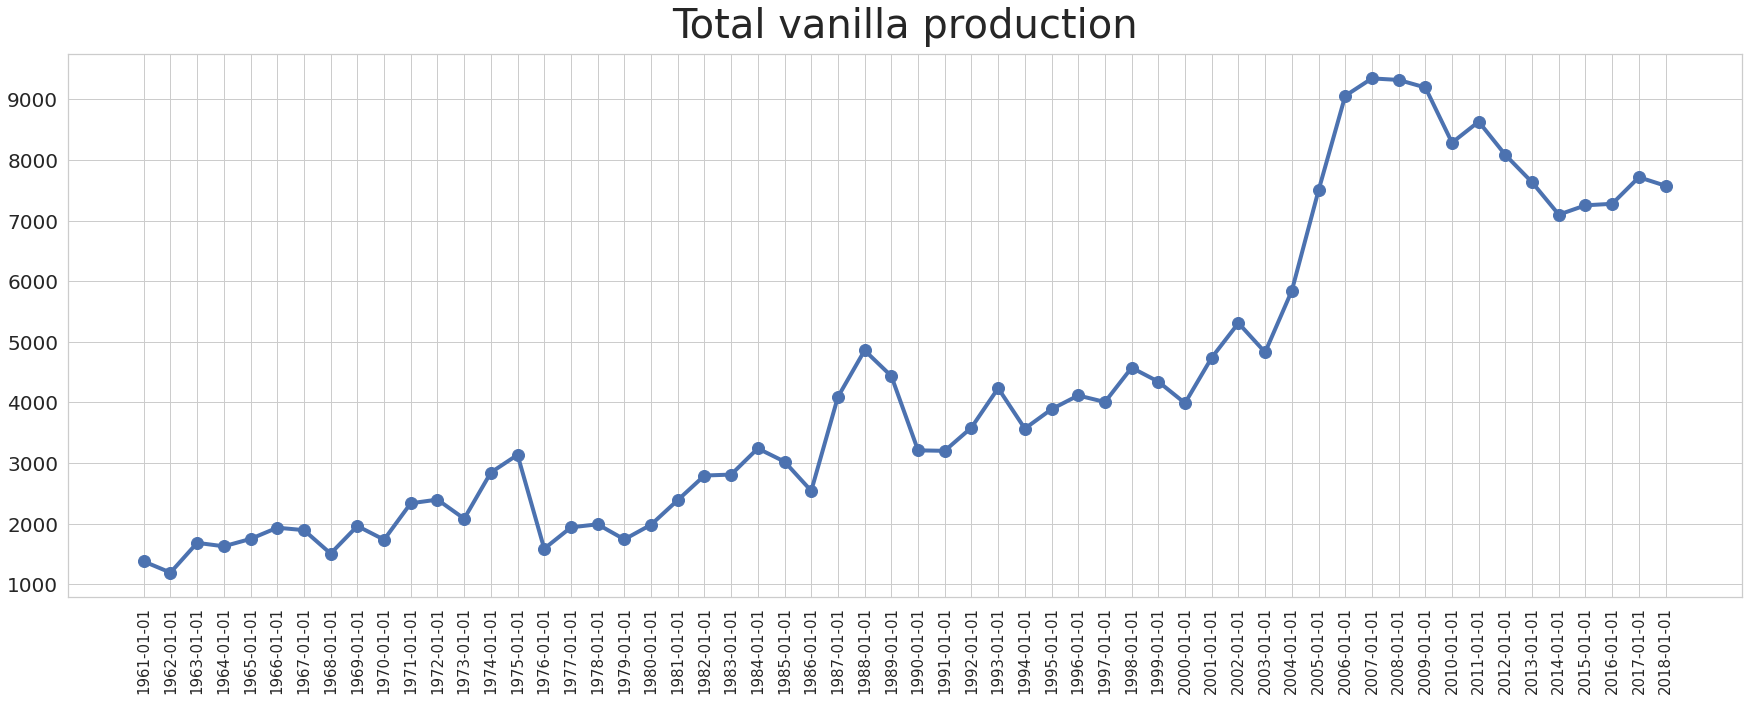

In [42]:
plot_production('Total')

In [43]:
# creating a temporary dataframe for plotting

lst = [id_df.copy(),  mg_df.copy() , others_df.copy()]
for i in range(3):
    lst[i]['Area'] =[lst[i].columns[1]]*len(id_df)
    lst[i].rename({lst[i].columns[1]: 'Value'},
                  axis=1,
                  inplace=True)
temp_df = pandas.concat(lst)

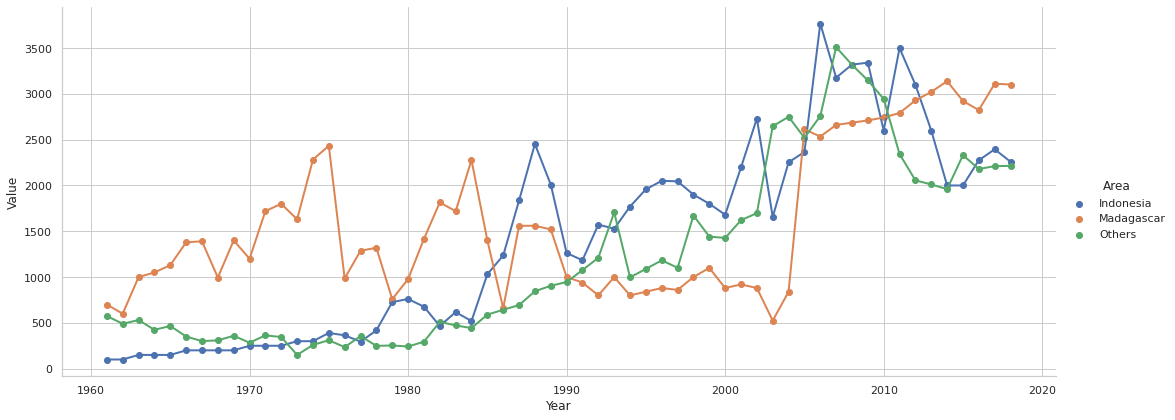

In [44]:
#plotting all the curve together
fg = seaborn.FacetGrid(data=temp_df,
                       hue='Area',
                       aspect=2.5,
                       height=6,
                       )
fg.map(plt.scatter, 'Year', 'Value')
fg.map(plt.plot, 'Year', 'Value', linewidth=2).add_legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

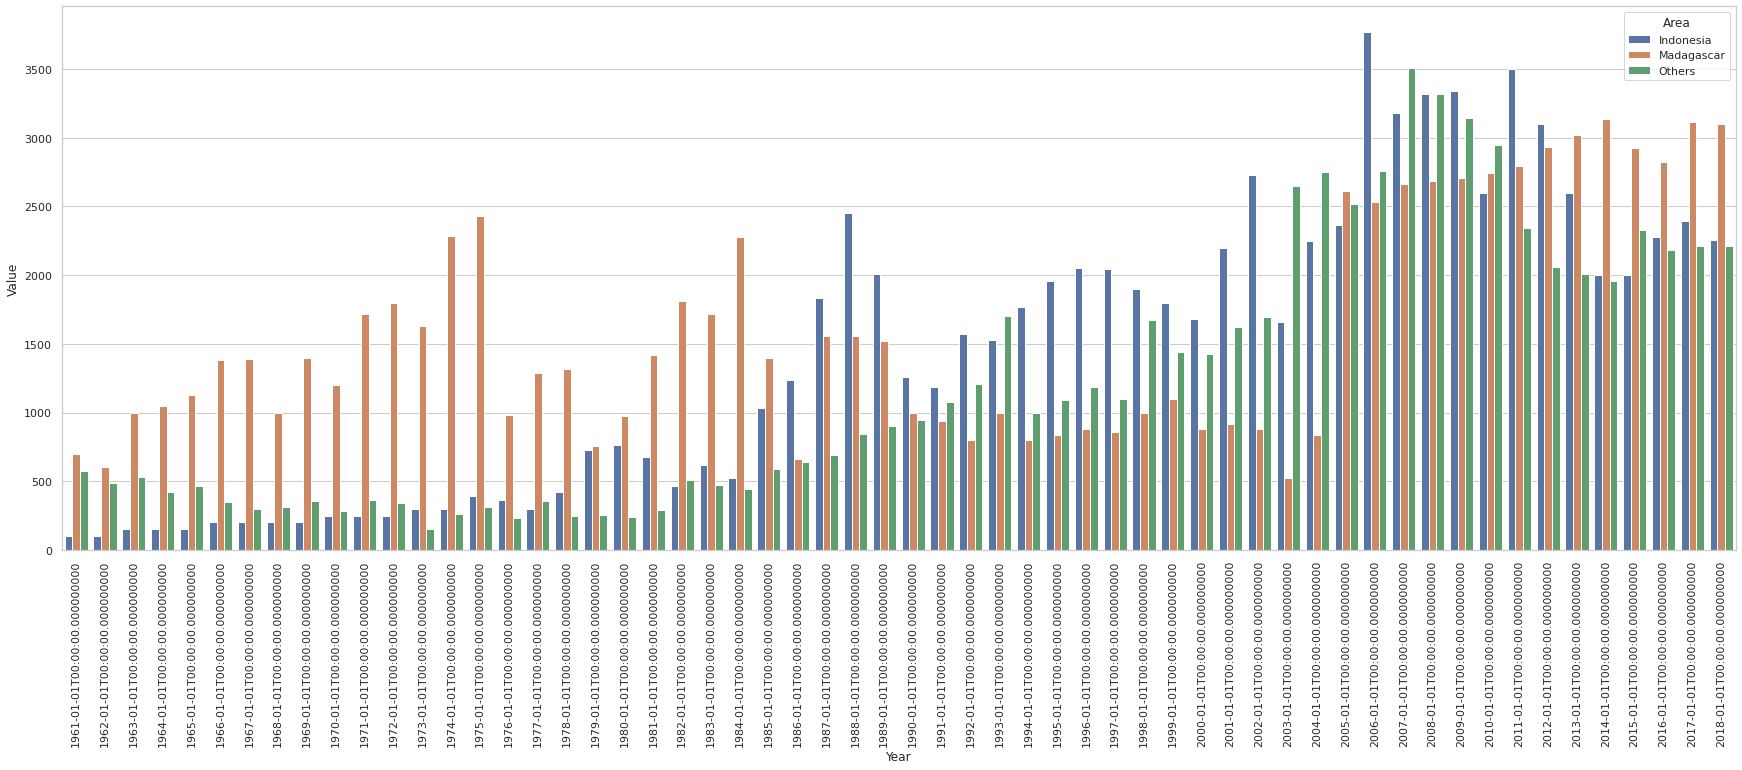

In [45]:
# plotting barplot
plt.figure(figsize=(30,10))
seaborn.barplot(data=temp_df,
                x='Year',
                y='Value',
                hue='Area')
plt.xticks(rotation=90)

### Plotting the world production

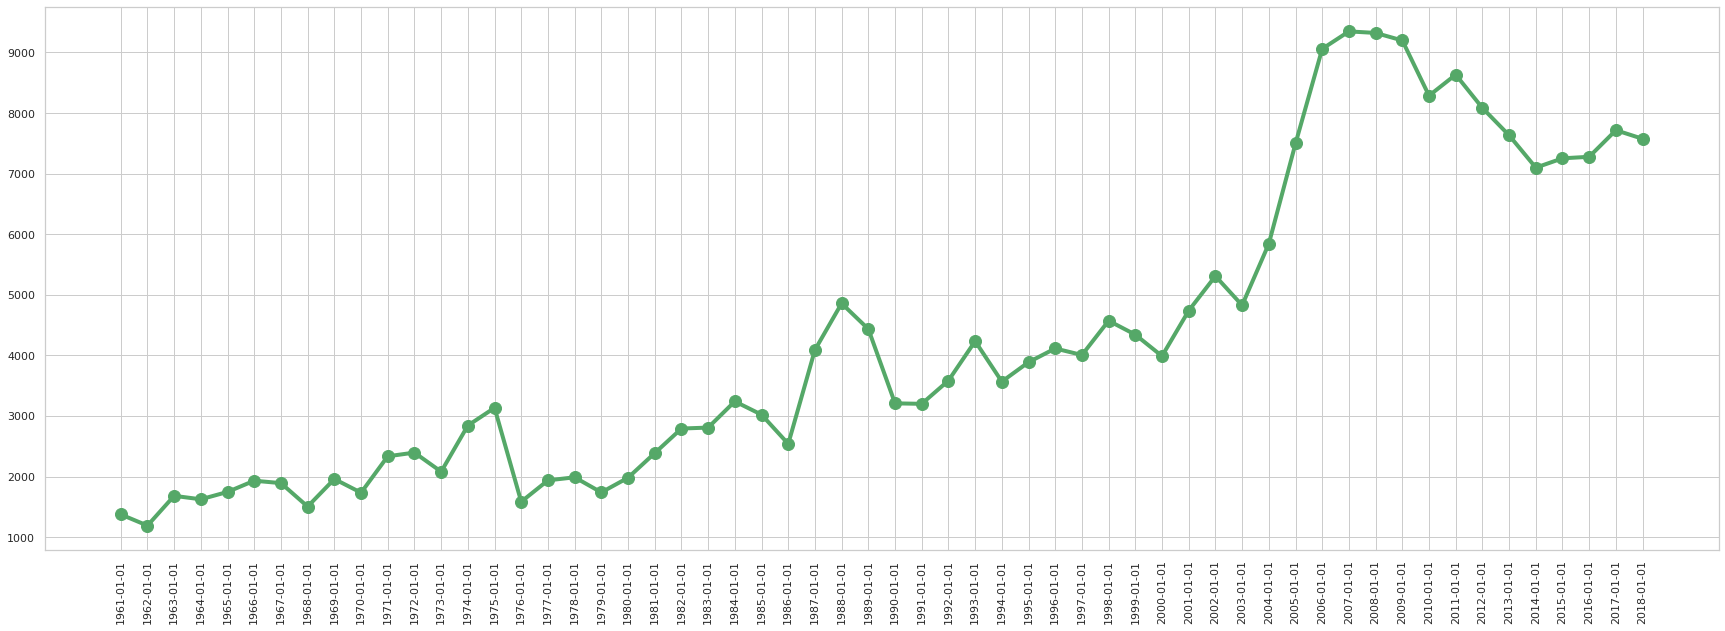

In [46]:
plt.figure(figsize=(30,10))
x = vanilla_prod_final['Year']
y = vanilla_prod_final['Total']
plt.plot(x,y, 'go-', linewidth=4, markersize=12)
plt.xticks(x, rotation=90)
plt.show()


# FORECASTING FUTURE PRODUCTION


##### The forecast will use Box-Jenkins (B-J) methodology with components:
    -Identification
    -Estimation
    -Diagnostic checking

## Importing Libraries

In [47]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# Augmented Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller

In [48]:
# modules for interactive visualization
from ipywidgets import interact, fixed
import ipywidgets as widgets

## Checking White Noise,  Stationarity and Correlations

### Plotting the moving average


In [49]:
def plot_moving_avg(area, k, ax):
    '''Plots the k-moving average of the production for the area area.
    Parameters:
    ----------
                area (str): a value in the Area column of vanilla_prod_final
                            pandas.DataFrame
                    k     : the number of past year for the moving average
                    ax    : matplotlib axis
    '''
    production_mean = vanilla_prod_final[area].rolling(k, win_type=None).mean()

    production_mean.plot(ax=ax,
                         linewidth=4,
                         fontsize=20)
    #return production_mean

In [50]:
area_array = vanilla_prod_final.columns.values[1:-1]
area_number = len(area_array)
area_array

array(['Indonesia', 'Madagascar', 'Others'], dtype=object)

In [51]:

def interactive_plot(k):
    '''Plots the k-moving average for all the area simultaneously
       Parameters:
       -----------
                   k (int): the lag for the moving average.
    '''
    fg, ax = plt.subplots(nrows=1,
                      ncols=area_number,
                      sharex=True,
                      sharey=True,
                      figsize=(30,10))
    ax.ravel()

    for area, i in zip(area_array, range(area_number)):
        ax[i].set_title(f'{area.capitalize()} {k}-moving average.', fontsize=30)
        plot_moving_avg(area, k, ax=ax[i])

k = widgets.IntSlider(min=1, max=10, step=1, value=2, description='lags')
interact(interactive_plot, k=k)

interactive(children=(IntSlider(value=2, description='lags', max=10, min=1), Output()), _dom_classes=('widget-…

<function __main__.interactive_plot(k)>

### Doing the lag plot

In [52]:
def lag_plot_all_area(lag):
    '''Apply lag_plot from pandas.plotting to all areas
        Parameters:
        ----------
                    lag (int): lag number.
    '''
    fg, ax = plt.subplots(nrows=1,
                          ncols=area_number,
                          sharex=True,
                          sharey=True,
                          figsize=(35,10))
    ax.ravel()

    for area, i in zip(area_array, range(area_number)):
        ax[i].set_title(f'{area.capitalize()} lag({lag}) plot.', fontsize=30)
        ax[i].tick_params(axis='x', labelsize=15)
        ax[i].tick_params(axis='y', labelsize=15)
        lag_plot(vanilla_prod_final[area],
                 lag=lag,
                 c='g',
                 ax=ax[i])

In [53]:
# plotting the lag plot with interact
lag = widgets.IntSlider(min=1, max=10, step=1, value=1, description='lag')
interact(lag_plot_all_area, lag=lag)

interactive(children=(IntSlider(value=1, description='lag', max=10, min=1), Output()), _dom_classes=('widget-i…

<function __main__.lag_plot_all_area(lag)>

### Comment
- From the lag plot, lag = 1 gives the highest correlation with all the data
accumulating on the 45 degree line.
- The moving averages show upward then downward trend for Indonesia and Others then a downward then
upward trend for Madagascar.
- The series are <b>not stationary</b> since they exhibit clear trends.

### Eploring differentiation and other transformation
They will be used to make the data stationary

#### Defining different transformation

In [54]:
# Differentiation
def differentiate(d):
    '''Differentiate the vanilla_prod_final data frame d times 
        Parameters:
        ----------
                    d (int): number of times to differentiate
        Returns:
        -------   
                    pandas.DataFrame: The differentiated dataframe.
    '''
    diff_df = vanilla_prod_final.copy()
    for item in diff_df.columns[1:]:
        diff_df[item]=diff_df[item].diff(periods=d)

    return diff_df

# Log transform
def log_transorm():
    '''Take the log transform of vanilla_prod_final data frame
    Returns:
    -------   
                pandas.DataFrame: the log transformed dataframe.
    '''
    log_df = vanilla_prod_final.copy()
    for item in log_df.columns[1:]:
        log_df[item] = np.log(log_df[item])
    return log_df

# Square Root transform
def sqrt_transform():
    '''Take the square root of vanilla_prod_final data frame
    Returns:
    -------   
                pandas.DataFrame: the square rooted dataframe.
    '''
    sqrt_df = vanilla_prod_final.copy()
    for item in sqrt_df.columns[1:]:
        sqrt_df[item] = np.sqrt(sqrt_df[item])
    return sqrt_df

# Cube Root transform
def cbrt_transform():
    '''Take the cube root of vanilla_prod_final data frame
        Returns:
        -------   
                pandas.DataFrame: the cube rooted dataframe.
    '''
    cbrt_df = vanilla_prod_final.copy()
    for item in cbrt_df.columns[1:]:
        cbrt_df[item] = np.cbrt(cbrt_df[item])
    return cbrt_df

# proportional change transform
def proportional_transform():
    '''Take the proportional transform of vanilla_prod_final data frame
        Returns:
        -------   
                pandas.DataFrame: the proportionaly transformed dataframe.
    '''
    propor_df = vanilla_prod_final.copy()
    for item in propor_df.columns[1:]:
        propor_df[item] = propor_df.shift(1)[item] / propor_df[item]
    return propor_df

# a custom made transform
def custom_made_transform():
    '''Perform a custom made transform consisting of differentiating
       first then taking the cube root. 
        Returns:
        -------   
                    pandas.DataFrame: the custom transformed dataframe
    '''   
    cust_df = vanilla_prod_final.copy()
    for item in cust_df.columns[1:]:
        cust_df[item] = cust_df[item].diff(periods=1)
        cust_df[item] = np.cbrt(cust_df[item])
    return cust_df

# choice of transform
def choose_transform(transform, d=1):
    ''' 
        Parameters:
        ----------
                    transform (str): the type of transform we want to apply,
                                     we have to choose among:
                                                 - 'differentiation'
                                                 - 'log'
                                                 - 'sqrt'
                                                 - 'cube root'
                                                 - 'proportional'
                                                 - 'custom made'
                    diff (d): number of times to differentiate,
                                not needed for other transform.
    '''
    #choosing the transform
    if transform == 'differentiation':
        df = differentiate(d)
    elif transform == 'log':
        df = log_transorm()
    elif transform == 'sqrt':
        df = sqrt_transform()
    elif transform == 'cube root':
        df = cbrt_transform()
    elif transform == 'proportional':
        df = proportional_transform()
    elif transform == 'custom made':
        df = custom_made_transform()

    return df

#### Creating a function to perform Augmented Dickey–Fuller test

In [55]:
def stationarity_test(transform, area):
    '''Runs an Augmented Dickey–Fuller test and prints the result.
       Will be used to decide is dframe is stationary.
       Also plots the series together with its rolling means
       and rolling standard deviation.

       Parameters
       ----------
                   area (str):  area value in the Area column of vanilla_prod_final.
                                Must be among: 'Indonesia', 'Madagascar', 'Others'.
                                
                    transform (str): the type of transform we want to plot,
                                     we have to choose among:
                                                 - 'differentiation'
                                                 - 'log'
                                                 - 'sqrt'
                                                 - 'cube root'
                                                 - 'proportional'
                                                 - 'custom made'
        Returns:
        -------
                    pandas.DataFrame : a summary table for the ADF test result
    '''
    df_transformed = choose_transform(transform)
    result = adfuller(df_transformed[area].dropna())

    # creating a summary table for result
    adf_summary = pandas.DataFrame()
    adf_summary['ADF Statistic'] = [round(result[0],5)]
    adf_summary['p-value'] = [round(result[1],8)]
    for key, value in result[4].items():
        adf_summary[key + '  Critical Value'] = [round(value, 3)]

    adf_summary = adf_summary.rename({0: 'Value'}, axis=0)
    adf_summary
    
    return adf_summary

#### Definining a plotting function to visualize the result of each transform and the ADF test

In [56]:
# function plotting the result of a chosen transform
def plot_transform(diff, transform, window):
    '''Plot the differentiated value for areas in the vanilla_prod_final dataframe
        Parameters:
        ----------
                    diff (int): number of times to differentiate,
                                not needed for other transform.

                    transform (str): the type of transform we want to plot,
                                     we have to choose among:
                                                 - 'differentiation'
                                                 - 'log'
                                                 - 'sqrt'
                                                 - 'cube root'
                                                 - 'proportional'
                                                 - 'custom made'

                    window (int): window for rolling mean and standard deviation.
    '''
    # choosing the transform
    df = choose_transform(transform, diff)
    
    fg, ax = plt.subplots(nrows=3,
                          ncols=area_number,
                          sharex=True,
                          sharey=True,
                          figsize=(35,20))
    ax.ravel()

    for area, i in zip(area_array, range(area_number)):
        # plotting the production curves
        ax[0][i].set_title(f'{area.capitalize()}', fontsize=30)
        ax[0][i].tick_params(axis='x', labelsize=15)
        ax[0][i].tick_params(axis='y', labelsize=15)
        df[area].plot(ax=ax[0][i])
        
        # plotting the Rolling Mean and Rolling Standard Deviation
        ax[1][i].set_title(f'{area.capitalize()} Rolling Mean & STD', fontsize=30)
        ax[1][i].tick_params(axis='x', labelsize=15)
        ax[1][i].tick_params(axis='y', labelsize=15)

        mean = df[area].rolling(window).mean()
        mean.plot(ax=ax[1][i],
                  c='r',
                  label='Rolling Mean')

        std = df[area].rolling(window).std()
        std.plot(ax=ax[1][i],
                 c='g',
                 label='Rolling STD')
        ax[1][i].legend(loc = 'best', fontsize=20)

        # Showing the Augmented Dickey–Fuller summary table
        adf_summary = stationarity_test(transform, area)


        row_labels = list(adf_summary.columns.values)
        col_labels = ['Value']
        table_vals = [ [str(item)] for item in adf_summary.T.Value]

        table = ax[2][i].table(cellText=table_vals,
                          rowLabels=row_labels,
                          colLabels=col_labels,
                          rowLoc='left',
                          colWidths= [.5]*3,
                          loc='center')
        table.scale(1, 4)
        table.auto_set_font_size(False)
        table.set_fontsize(24)
        ax[2][i].axis('off')
        ax[2][i].set_title(f'{area.capitalize()} ADF test summary', fontsize=30)


In [57]:
# plotting the result of transform using interact

diff = widgets.Dropdown(
            options= [1, 2, 3, 4, 5, 6],
            value=1,
            description='differention',
)

trans = widgets.Dropdown(
            options=['differentiation',
                     'log',
                     'sqrt',
                     'cube root',
                     'proportional',
                     'custom made'],
            value='differentiation',
            description='transform',
)

window = widgets.Dropdown(
            options= list(range(1,20)),
            value=6,
            description='window',
)

interact(plot_transform, diff=diff, transform=trans, window=window)



interactive(children=(Dropdown(description='differention', options=(1, 2, 3, 4, 5, 6), value=1), Dropdown(desc…

<function __main__.plot_transform(diff, transform, window)>

### Comment
- Differentiation is the best simplest choice of transform, its p-value for the Augmented Dickey–Fuller test is 0.0 for all producers.
- Differentiating once seems to be the best we can do as doing more does not make the data more stationary.

### Ploting Autocorrelation and Partial Autocorrelation

### Autocorrelation

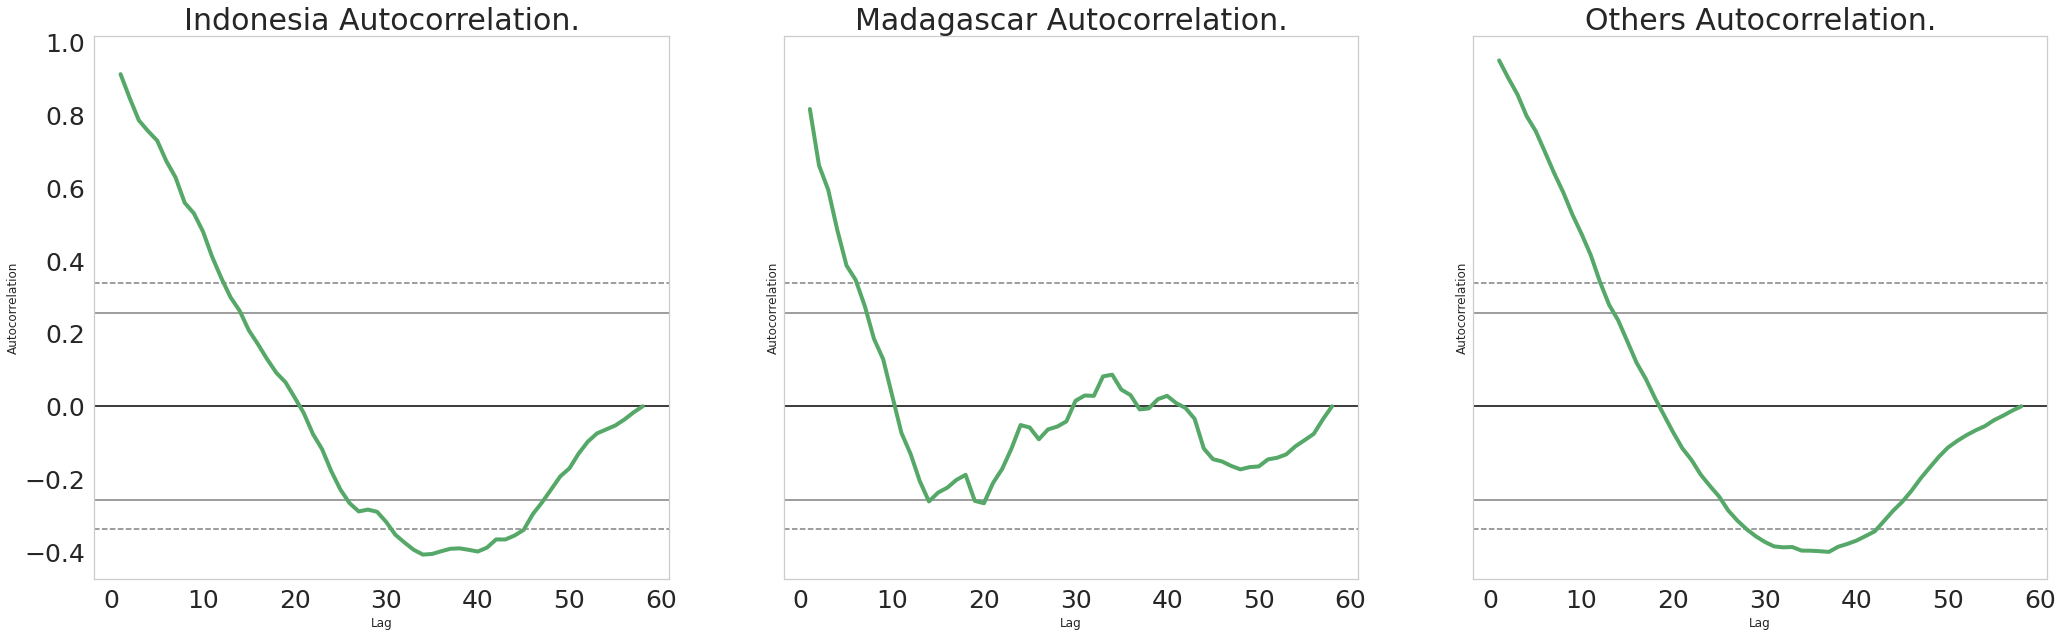

In [58]:
# plotting Autocorrelation use pandas.plotting
fg, ax = plt.subplots(nrows=1,
                      ncols=area_number,
                      sharex=True,
                      sharey=True,
                      figsize=(35,10))
ax.ravel()

for area, i in zip(area_array, range(area_number)):
    df = vanilla_prod_final.copy()
    autocorrelation_plot(df[area], c='g', ax=ax[i], linewidth=4)
    ax[i].set_title(f'{area.capitalize()} Autocorrelation.', fontsize=30)
    ax[i].tick_params(axis='x', labelsize=25)
    ax[i].tick_params(axis='y', labelsize=25)

### Plotting ACF anf PACF

In [59]:
# defining a plot function for the acf and pacf for all the area

def plot_all_acf_pacf(diff, acf_lag, pacf_lag):
    ''' Plots the ACF and the PACF next to each other
        for each of the area in the final dataframe.
        Parameters:
        -----------
                      diff (int) : number of times we differentiate the dataframe.
                                   It's the d value for Integrated series I(d).   
                    acf_lag (int): number of lag for the acf.
                    pacf_lag (int): number of lag for the pacf.
    '''
    # we first choose the dataframe according to value of d
    temp_df = vanilla_prod_final.copy()
    if diff==None:
        pass
    else:
        temp_df = temp_df.diff(periods=diff)
        temp_df = temp_df.dropna()

    fg, ax = plt.subplots(nrows=area_number,
                          ncols=2,
                          sharex=False,
                          sharey=False,
                          figsize=(25,30))

    for area, i in zip(area_array, range(area_number)):
        # plotting the ACF
        title_acf = f'{area.capitalize()} ACF.'
        plot_acf(temp_df[area],
                 lags=acf_lag,
                 c='b',
                 ax=ax[i][0])
        ax[i][0].tick_params(axis='x', labelsize=25)
        ax[i][0].tick_params(axis='y', labelsize=25)
        ax[i][0].set_title(title_acf, fontsize=35)
        
        # plotting the PACF
        title_pacf = f'{area.capitalize()} PACF.'
        plot_pacf(temp_df[area],
                 lags=pacf_lag,
                 c='b',
                 ax=ax[i][1])
        ax[i][1].tick_params(axis='x', labelsize=25)
        ax[i][1].tick_params(axis='y', labelsize=25)
        ax[i][1].set_title(title_pacf, fontsize=35)

In [60]:
# plotting the acf and pacf using interact
diff = widgets.Dropdown(
            options=[('None', None), ('1', 1), ('2', 2), ('3', 3)],
            value=None,
            description='differention',
)
acf_lag = widgets.IntSlider(min=5,
                            max=50,
                            step=1,
                            value=10,
                            description='lag for ACF')

pacf_lag = widgets.IntSlider(min=1,
                             max=11,
                             step=1,
                             value=10,
                             description='lag for PACF')

interact(plot_all_acf_pacf, diff=diff, acf_lag=acf_lag, pacf_lag=pacf_lag)

interactive(children=(Dropdown(description='differention', options=(('None', None), ('1', 1), ('2', 2), ('3', …

<function __main__.plot_all_acf_pacf(diff, acf_lag, pacf_lag)>

### Noise and ACF, PACF Deduction
- The time series are not white noise so we can predict future values.
- The ACF decay toward zero following a damped exponential pattern.
- The PACF is only significant till the 1 lag for all areas.
- Differentiating once seems to be the most efficient standard transform we may however do a custom made transform.
- After differentiating once or twice, the behabor of ACF and PACF changed.
- Based on all of this  an AR model couple with I(1) seems to be appropriate:
        - We will forecast using AR first.
        - We will try other methods (differeny ARIMA) and compare them with the AR.
        - We will decide which one to choose for real forecasting.

## Doing the Forecasting

### AR  AutoRegressive with  varing  lag

In [61]:
# importing forecasting library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [62]:
from statsmodels.tsa.arima_model import ARIMA

### #1 Without validation

In [63]:
def original_dataframe(original):
    '''Return a version the original data frame vanilla_prod_final
        or its differentiated version.
    Parameters:
    -----------
                answer (bool): True or False
    Returns
    -------
                pandas.DataFrame: the original dataframe or its
                                    differentiated version
    '''
    if original:
        df = vanilla_prod_final.copy()
    else:
        df = differentiate(1)
        df = df.dropna()
    return df

# split the data into 80% train and 20% test
def custom_train_test_split(df, area, train_ratio=0.8):
    df = df[[area]]
    train_size = int(len(x)*train_ratio)
    train, test = df.iloc[:train_size], df.iloc[train_size:]
    return train, test

def run_model_1(area, p,d,q, trend, original, interactive=False):
    '''Create an ARIMA(p,d,q) model.
       Train on the train data and test on the test data.
       Compute mean squared error of the testing and its square root.
       Print the predicted vs true value vs absolute error for the test.
       Print the statistic summary of the training.
       Print the mse and its square root.
       Plot predicted vs true value for the test data.

    Parameters:
    -----------
                area (str):  area value in the Area column of vanilla_prod_final.
                                Must be among: 'Indonesia', 'Madagascar', 'Others'.
                                
                p (int): value of p for ARIMA(p,d,q) model.
                d (int): value of d for ARIMA(p,d,q) model.
                q (int): value of q for ARIMA(p,d,q) model.

                trend (str): trend parameter for ARIMA model fit method,
                             specifies if we want a constant or not.
                             Value must be among:
                                                 * 'c' (with constant)
                                                 * 'nc' (without constant)

                original (bool): True means we use the the original
                                    vanilla_prod_final dataframe:
                                 False means we use the differentiated one.
                
                interactive (bool): print some summary and plot if True,
                                    do not print it if false.
    Returns:
    -------
            ARIMA.result object.
    '''
    # getting the dataframe
    df = original_dataframe(original)
    # we need to set the index as timestamp or datetime
    df = df.set_index('Year')
    # getting the train and test size
    train, test = custom_train_test_split(df, area)
    
    # create a model using statsmodel ARIMA
    Model_1 = ARIMA(train, order=(p,d,q), freq= 'AS-JAN')

    # fitting the model
    model_1_fit = Model_1.fit(transparams=True, trend=trend)

    # getting the statistics summary
    summary = model_1_fit.summary()

    # testing with the test sample
    prediction = model_1_fit.predict(test.index[0], test.index[-1], typ='levels')
    
    # putting the prediction and the true value in a data frame
    test_result = pandas.concat([prediction, test], axis=1)
    test_result['Absolute Error'] = np.abs(test_result[0] - test_result[area])
    test_result.rename({0: 'Prediction', area: 'True Value'}, axis=1, inplace=True)
    # getting the testing error
    #np.abs(test.values-prediction.values)
    mse = mean_squared_error(test.values, prediction.values)
    error = np.sqrt(mse)

    # print some summary and plot
    if interactive:
        print('\n MODEL RESULT \n ============\n',
              summary,
              '\n Test result\n ============',
              test_result,
              '\n mean squared error and error\n  -------------------------',
              (mse, error),
             '\n',
             sep='\n\n')

        model_1_fit.plot_predict()
        test_result.plot(title='Test Result Plot.')
    else:
        return model_1_fit


In [64]:
# defining a function for model result visualisation

def visualize_model(model_function):
    '''Run model_function using interact
    Parameters
    ----------
            model_function (function): function which runs an ARIMA(p,d,q) model
    '''
    area = widgets.Dropdown(
                            options=['Indonesia', 'Madagascar', 'Others'],
                            value='Indonesia',
                            description='Region'
                           )
    p = widgets.Dropdown(
                         options=list(range(10)),
                         value=1,
                         description='p value for ARIMA(p,d,q)'
                        )
    d = widgets.Dropdown(
                         options=[0,1,2],
                         value=1,
                         description='d value for ARIMA(p,d,q)'
                        )
    q = widgets.Dropdown(
                         options=list(range(10)),
                         value=0,
                         description='q value for ARIMA(p,d,q)'
                        )
    trend = widgets.Dropdown(
                             options=[('with constant', 'c'), ('without constant', 'nc')],
                             value='c',
                             description='trend'
                            )
    original = widgets.Dropdown(
                                options=[('Original', True), ('Differentiated', False)],
                                value=True,
                                description= 'Data Frame'
                               )


    interact(model_function,
             area=area,
             p=p,
             d=d,
             q=q,
             trend=trend,
             original=original,
             interactive=fixed(True))


In [65]:
visualize_model(run_model_1)

interactive(children=(Dropdown(description='Region', options=('Indonesia', 'Madagascar', 'Others'), value='Ind…

### Comment
- After experimentation ARIMA(1,1,0) with constant seems to be the best fit but the p-values of the coefficients are largely higher than 0.1
- We need to refine our model

### #2 Using Walk Forward Validation
- We are going to divide the data into train/validation and test.
- We will divide the train/validation data into 80% train and 20% validation.
- The 20% validation will be divided into 8 blocks.
- The validation periods will be distributed in a way that we have a walk forward validation

<img src='g4705.png'>

In [284]:

# splitting the data for walk-forward validation
def train_valid_test_split(df, area, train_valid_ratio=1, validation_block=8):
    ''''''
    df = df[[area]]
    train_validation_size = int(len(df)*train_valid_ratio)
    test = df.iloc[train_validation_size:]
    period_size = int(train_validation_size*0.3 / validation_block)
    train_batch_size = train_validation_size - validation_block*period_size

    train_list = list()
    validation_list = list()
    past_valid_size = 0
    for _ in range(validation_block):
        train = df.iloc[past_valid_size : past_valid_size + train_batch_size]
        validation = df.iloc[past_valid_size + train_batch_size:  past_valid_size + train_batch_size + period_size ]
        past_valid_size = past_valid_size + period_size
        train_list.append(train)
        validation_list.append(validation)
    return train_list, validation_list, test

In [296]:

def run_model_2(area, p,d,q, trend, original, interactive=False):
    '''Create an ARIMA(p,d,q) model.
       Similar to run_model_1 but implement a walk-forward validation
    Parameters:
    -----------
                area (str):  area value in the Area column of vanilla_prod_final.
                                Must be among: 'Indonesia', 'Madagascar', 'Others'.
                p (int): value of p for ARIMA(p,d,q) model.
                d (int): value of d for ARIMA(p,d,q) model.
                q (int): value of q for ARIMA(p,d,q) model.

                trend (str): trend parameter for ARIMA model fit method,
                             specifies if we want a constant or not.
                             Value must be among:
                                                 * 'c' (with constant)
                                                 * 'nc' (without constant)
    
                original (bool): True means we use the the original
                                    vanilla_prod_final dataframe:
                                 False means we use the differentiated one.
                
                interactive (bool): print some summary and plot if True,
                                    do not print it if false.
    Returns:
    -------
            ARIMA.result object.
    '''
    # getting the dataframe
    df = original_dataframe(original)
    # we need to set the index as timestamp or datetime
    df = df.set_index('Year')

    # splitting the data for the walk-forward validation
    train_list, validation_list, test = train_valid_test_split(df, area)

    params = None
    rmse_list = list()
    for i in range(8):
        train = train_list[i]
        validation = validation_list[i]
        #print(train, validation, sep='\n')

        # create a model using statsmodel ARIMA
        Model = ARIMA(train, order=(p,d,q), freq= 'AS-JAN')

        # fitting the model, we remove constant so we set trend='nc'
        model_fit = Model.fit(start_params=params, transparams=True, trend=trend)

        # GETTING THE PARAMETERS. IT WILL BE USED FOR THE NEXT ITERATION
        params = model_fit.params

        # getting the statistics summary
        summary = model_fit.summary()

        # testing with the test sample
        prediction = model_fit.predict(validation.index[0], validation.index[-1], typ='levels')

        # putting the prediction and the true value in a data frame
        validation_result = pandas.concat([prediction, validation], axis=1)
        validation_result['Absolute Error'] = np.abs(validation_result[0] - validation_result[area])
        validation_result.rename({0: 'Prediction', area: 'True Value'}, axis=1, inplace=True)
        # getting the testing error
        #np.abs(test.values-prediction.values)

        mse = mean_squared_error(validation.values, prediction.values)
        error = np.sqrt(mse)
        rmse_list.append(error / np.average(validation_list[i]))
            # print some summary and plot
        if interactive:
            print(f'\n\t STEP {i}',
                  '\n TRAIN RESULT \n ============',
                  'p-values\n -----',
                  model_fit.pvalues,
                  'VALIDATION RESULT \n ===============\n',
                  validation_result,
                  (mse, error),
                  sep='\n')

            #plotting summary
            fg, ax = plt.subplots(nrows=1,
                                  ncols=2,
                                  sharex=False,
                                  sharey=False,
                                  figsize=(15,5))
            ax.ravel()
            model_fit.plot_predict(ax=ax[0])
            validation_result.plot(ax=ax[1],
                                   title='Validation Plot',
                                   linewidth=3)
            plt.show()
            print('='*80)

    if interactive:
        plt.plot(rmse_list, 'ro-', linewidth=3)
        plt.title('The Validation RMSE Ratio')
        plt.show()
    else:
        return model_fit

In [297]:
model2_result = visualize_model(run_model_2)

interactive(children=(Dropdown(description='Region', options=('Indonesia', 'Madagascar', 'Others'), value='Ind…

### #3 Using facebook prophet

In [69]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [70]:
area = 'Madagascar'
vanilla_prophet = vanilla_prod_final[['Year', area]]
vanilla_prophet = vanilla_prophet.rename({'Year': 'ds', area:'y'}, axis=1)

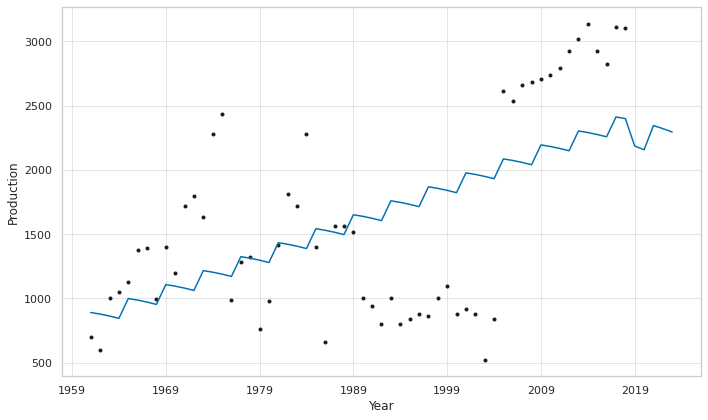

<Figure size 1080x1080 with 0 Axes>

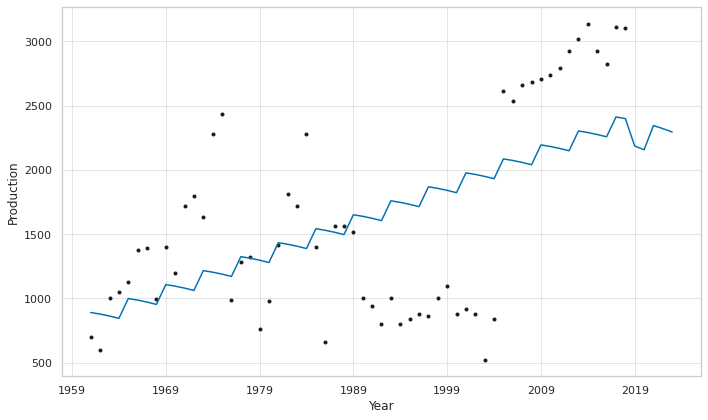

In [71]:
model = Prophet(yearly_seasonality='auto',
                weekly_seasonality=False,
                daily_seasonality=False,
                holidays=None,
                uncertainty_samples=False,
                )

model.fit(vanilla_prophet)
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)
plt.figure(figsize=(15,15))
model.plot(forecast, xlabel='Year', ylabel='Production')

<Figure size 1080x1080 with 0 Axes>

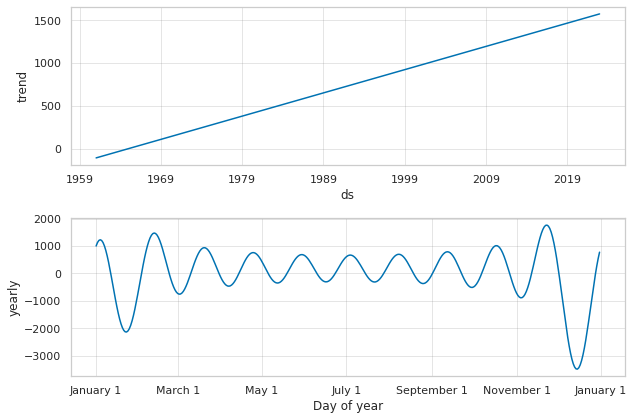

In [72]:
plt.figure(figsize=(15,15))
figure = model.plot_components(forecast)

### Comment
- facebook prophet is not suitable for the forecast

## Forecasting Conclusion
- The type of model depends on the region but the one with walk forward validation is the most suitable forecasting model. The best model which makes the coefficient p-values 0 (< 0.00...) and minimize the rmse and the absolute error are: 
        - For Indonesia: AR(1) (ARIMA(1,0,0)) without constant using the original dataframe.
        - For Madagascar: ARIMA(0,2,1) without constant using the original dataframe.
        - For Others: AR(1) (ARIMA(1,0,0)) without constant using the original dataframe.
- A prediction of up to 3 years is the most reasonable.


## Finalizing the Forecasting

In [322]:
import datetime as dt

In [323]:
final_model = dict()

# For Indonesia: AR(1) (ARIMA(1,0,0)) without constant using the original dataframe.
final_model['Indonesia'] = run_model_2('Indonesia', 1,0,0, trend='nc', original=True)

# For Madagascar: ARIMA(1,1,1) without constant using the differentiated dataframe.
#final_model['Madagascar'] = run_model_2('Madagascar', 0,2,1, trend='nc', original=True)

# For Others: ARIMA(1,1,0) without constant using the differentiated dataframe.
final_model['Others'] = run_model_2('Others', 1,0,0, trend='nc', original=True)

In [324]:
final_model['Madagascar'] = run_model_2('Madagascar', 0,2,1, trend='nc', original=True)

/home/huygens/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/huygens/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1489: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-1. / hess[0])


In [325]:
#defining a function which predict the production
def predict_production(area, end):
    '''
    Parameters:
                end (int): year after 2018
    '''
    # date not in train and validation
    unseen = end - 2018
    
    #start and end date of prediction
    start = end - 22
    end = str(end)+'-01-01'
    start = str(start)+'-01-01'
    
    start = dt.datetime.strptime(start, '%Y-%m-%d')
    end = dt.datetime.strptime(end, '%Y-%m-%d')
    result = final_model[area].predict(start, end, typ='levels')
    result = pandas.DataFrame({area:result})
#     if area == 'Madagascar':
#         #getting the differentiated data back to normal
#         filler = vanilla_prod_final[['Year', area]]
#         filler = filler.set_index('Year')
#         result = result.cumsum().fillna(filler)
    result = result.rename({area:'Production'}, axis=1)

    #showing only the future (unseen) date
    result = result[-unseen:]

    return result

### Forecasting tool

In [326]:
# Doing prediction using interact
area = widgets.Dropdown(
                        options=['Indonesia', 'Madagascar', 'Others'],
                        value='Indonesia',
                        description='Region'
                       )
year = widgets.Dropdown(
                        options=list(range(2019,2024)),
                        value=2020,
                        description='Year'
                       )
interact(predict_production, area=area, end=year)

interactive(children=(Dropdown(description='Region', options=('Indonesia', 'Madagascar', 'Others'), value='Ind…

<function __main__.predict_production(area, end)>

In [283]:
vanilla_prod_final.tail(6)

,Year,Indonesia,Madagascar,Others,Total
52,2013-01-01,2600.0,3021.0,2011.0,7632.0
53,2014-01-01,2000.0,3139.0,1960.0,7099.0
54,2015-01-01,2000.0,2922.0,2331.0,7253.0
55,2016-01-01,2275.0,2823.0,2180.0,7278.0
56,2017-01-01,2395.0,3111.0,2211.0,7717.0
57,2018-01-01,2259.0,3102.0,2214.0,7575.0


# =========== THE END  # WORK STILL IN PROGRESS ==============